In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%autoreload 2

In [11]:
import pandas as pd
from utility_function import get_X_y_DNN , DNN_model, plot_loss
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense , Input , LSTM, Bidirectional, Dropout
from tensorflow.keras.models import Model , Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [12]:
def init_model(length, n_days, features) :
    model = Sequential()
    model.add(Dense(85,activation = 'relu',input_dim=(length*features)))
    #model.add(Dense(70, activation = 'relu'))
    model.add(Dense(60, activation = 'relu'))
    model.add(Dense(20,activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

def get_sample(df, length, temporal_horizon, style, start):

    temporal_horizon = temporal_horizon - 1
    last_possible = df.shape[0] - temporal_horizon - length

    if style == "linear" :
        X_sample = df.drop(columns = 'price').iloc[start: start+length].values
        y_sample = df['price'].iloc[start+length: start+length+temporal_horizon+1].values
        return X_sample, y_sample
    if style == "clf" :
        X_sample = df.drop(columns = 'up').iloc[start: start+length].values
        y_sample = df['up'].iloc[start+length+temporal_horizon-1: start+length+temporal_horizon].values
        return X_sample, y_sample

def get_X_y(df, temporal_horizon, length, style):
    X, y = [], []

    for len_ in range(len(df)-temporal_horizon -length):
        xi, yi = get_sample(df, length, temporal_horizon, style , len_)
        X.append(xi)
        y.append(yi)

    return X, y

In [13]:
df  = pd.read_csv('data_2.csv').set_index('date').dropna()

In [14]:
up = [0,0,0,0,0,0,0]
for i in range(7,len(df)):
    if df['close'].iloc[i] > df['close'].iloc[i-7] :
        up.append(1)
    else :
        up.append(0)
df['up'] = up

In [15]:
n_days = 1
length = 20
n = 1880
s = 2610
df_test = df.iloc[s-length+11*90:s+90+11*90]
df_ = df.iloc[n+11*90:s+11*90]

In [16]:
scaler = MinMaxScaler()
scaler.fit(df_)
df_[df_.columns] =  scaler.transform(df_)
df_test[df_.columns] =  scaler.transform(df_test)

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launch

In [17]:
model = init_model(length, n_days,17)

In [18]:
X_train, y_train = get_X_y_DNN(df, n_days, length, 'clf')

In [16]:
es = EarlyStopping(monitor = 'val_accuracy',mode = 'min' , verbose = 1, patience = 30, restore_best_weights = True)

In [34]:
history = model.fit(np.array(X_train), np.array(y_train),
                    #validation_split = 0.3,
                    #callbacks = [es],
                    epochs = 500,
                    batch_size = 64,
                    verbose = True,
                    shuffle = True)

Epoch 1/500
12/12 [==============================] - 0s 1ms/step - loss: 0.7015 - accuracy: 0.5176
Epoch 2/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6848 - accuracy: 0.5374
Epoch 3/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6842 - accuracy: 0.5331
Epoch 4/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5275
Epoch 5/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5769
Epoch 6/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6755 - accuracy: 0.5670
Epoch 7/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.5458
Epoch 8/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5331
Epoch 9/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5684
Epoch 10/500
12/12 [==============================] - 0s 1ms/step - loss: 0.6791 - accuracy: 0.5219
Epoch 11/

12/12 [==============================] - 0s 1ms/step - loss: 0.5426 - accuracy: 0.7391
Epoch 84/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5273 - accuracy: 0.7489
Epoch 85/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5490 - accuracy: 0.7207
Epoch 86/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5552 - accuracy: 0.7052
Epoch 87/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5960 - accuracy: 0.6784
Epoch 88/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5593 - accuracy: 0.6883
Epoch 89/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.7236
Epoch 90/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5203 - accuracy: 0.7447
Epoch 91/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5028 - accuracy: 0.7715
Epoch 92/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.7320
Epoch 93/500


12/12 [==============================] - 0s 1ms/step - loss: 0.2813 - accuracy: 0.8646
Epoch 246/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2533 - accuracy: 0.8858
Epoch 247/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3699 - accuracy: 0.8152
Epoch 248/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2142 - accuracy: 0.9168
Epoch 249/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2114 - accuracy: 0.9111
Epoch 250/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8575
Epoch 251/500
12/12 [==============================] - 0s 998us/step - loss: 0.2784 - accuracy: 0.8801
Epoch 252/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2863 - accuracy: 0.8702
Epoch 253/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2889 - accuracy: 0.8646
Epoch 254/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.8886
Ep

12/12 [==============================] - 0s 1ms/step - loss: 0.1794 - accuracy: 0.9126
Epoch 327/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9704
Epoch 328/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2063 - accuracy: 0.9083
Epoch 329/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8660
Epoch 330/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2085 - accuracy: 0.9013
Epoch 331/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1792 - accuracy: 0.9238
Epoch 332/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3223 - accuracy: 0.8491
Epoch 333/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1386 - accuracy: 0.9506
Epoch 334/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9690
Epoch 335/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1145 - accuracy: 0.9591
Epoc

12/12 [==============================] - 0s 1ms/step - loss: 0.1721 - accuracy: 0.9309
Epoch 489/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0787 - accuracy: 0.9676
Epoch 490/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.8886
Epoch 491/500
12/12 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.8307
Epoch 492/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1366 - accuracy: 0.9436
Epoch 493/500
12/12 [==============================] - 0s 1ms/step - loss: 0.1009 - accuracy: 0.9605
Epoch 494/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9929
Epoch 495/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0426 - accuracy: 0.9944
Epoch 496/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9845
Epoch 497/500
12/12 [==============================] - 0s 1ms/step - loss: 0.0545 - accuracy: 0.9873
Epoc

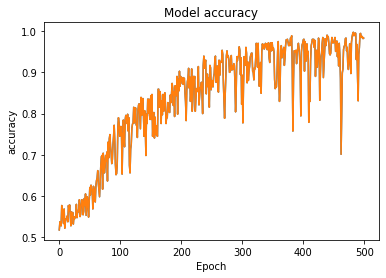

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
#plt.legend(['Train', 'Validation'], loc='best')
plt.show()

In [315]:
pred_ = []
pred = []
for x in range(len(df_test)-length):
    y = df_test['ath'][x:x+length].values.ravel()
    y.shape = (1,20)
    predict = model.predict(y)
    pred_.append(predict)
    if predict > 0.1: 
        pred.append(1)
    else : 
        pred.append(0)
accuracy = accuracy_score(df_test['up'][length:].values, np.array(pred).ravel())
#tn, fp, fn, tp = confusion_matrix(df_test['up'][length:].values, np.array(pred).ravel()).ravel()

In [316]:
accuracy

0.0

In [263]:
tp/(tp+fn)

0.8367346938775511

In [264]:
tn / (tn+fp)

0.1951219512195122

In [351]:
df[:30]

,close,rsi_14,macd,william_a/d,ATR,ath,new_adress,sopr,utxo,transac_sec,mvrv_z,nvts,pct_profit,active_adress,hash_rate,transactions_count,utxo_spent,up
date,,,,,,,,,,,,,,,,,,
2010-08-24,-2.733368,52.334489,0.000470,-3.732089,-5.278403,0.698399,5.981414,1.015565,6.142037,-6.266877,0.806509,67.174844,0.921034,6.104793,22.419736,5.099866,6.624065,0
2010-08-25,-2.736450,52.077594,0.000350,-3.803268,-5.480473,0.696250,5.872118,1.009479,6.059123,-6.362797,0.755628,66.498720,0.917029,5.739793,22.430048,5.003946,5.438079,0
2010-08-26,-2.748872,50.999206,0.000191,-3.887439,-5.553892,0.687654,5.849325,1.002846,6.075346,-6.304148,0.726189,66.344337,0.904390,6.120297,22.323081,5.062595,6.001415,0
2010-08-27,-2.733368,52.328073,0.000141,-3.794339,-5.581002,0.698399,5.703782,1.023819,5.874931,-6.554559,0.707063,66.285335,0.922312,5.805135,22.390555,4.812184,5.541264,0
2010-08-28,-2.739541,51.723827,0.000070,-3.812278,-5.650817,0.694101,5.857933,1.004257,6.070738,-6.236844,0.737287,66.864224,0.909934,5.908083,22.386427,5.129899,5.872118,0
2010-08-29,-2.748872,50.776676,-0.000033,-3.844468,-5.677593,0.687654,5.575949,0.960927,5.743003,-6.781775,0.704765,66.434428,0.896496,5.442418,22.340395,4.584967,5.123964,0
2010-08-30,-2.733830,52.297486,-0.000039,-2.914009,-5.230725,0.698077,5.777652,0.975308,6.045005,-6.173786,0.619456,64.980322,0.924880,5.929589,22.250907,5.192957,5.863631,0
2010-08-31,-2.813411,44.680374,-0.000428,-3.010079,-5.373734,0.644676,6.018593,1.017178,6.315358,-5.817667,0.649930,65.314845,0.850953,6.320768,22.460708,5.549076,6.645091,0
2010-09-01,-2.775794,48.424168,-0.000549,-2.956939,-5.430951,0.669389,5.963579,0.958406,6.263398,-5.959571,0.509313,62.720559,0.889098,6.109248,22.319425,5.407172,6.306275,0


In [362]:
y_sample = df['up'].iloc[2+5+1: 2+5+1+1]

In [359]:
df['up'].iloc[13]

0

In [368]:
score_trim = {}

In [358]:
df.drop(columns = 'up').iloc[2: 7].values

array([[-2.74887220e+00,  5.09992057e+01,  1.91259577e-04,
        -3.88743880e+00, -5.55389188e+00,  6.87654454e-01,
         5.84932478e+00,  1.00284605e+00,  6.07534603e+00,
        -6.30414792e+00,  7.26189425e-01,  6.63443367e+01,
         9.04389859e-01,  6.12029742e+00,  2.23230806e+01,
         5.06259503e+00,  6.00141488e+00],
       [-2.73336801e+00,  5.23280733e+01,  1.41335072e-04,
        -3.79433874e+00, -5.58100242e+00,  6.98399054e-01,
         5.70378247e+00,  1.02381934e+00,  5.87493073e+00,
        -6.55455860e+00,  7.07063214e-01,  6.62853350e+01,
         9.22312445e-01,  5.80513497e+00,  2.23905548e+01,
         4.81218436e+00,  5.54126355e+00],
       [-2.73954087e+00,  5.17238271e+01,  6.97959126e-05,
        -3.81227823e+00, -5.65081736e+00,  6.94101214e-01,
         5.85793315e+00,  1.00425652e+00,  6.07073773e+00,
        -6.23684424e+00,  7.37286887e-01,  6.68642239e+01,
         9.09933686e-01,  5.90808294e+00,  2.23864269e+01,
         5.12989871e+00,  5.8

In [369]:
for x in ['dnn', 'lstm'] :
    with open(f'perf_summary/20-1/{x}/2y/score_test.json', 'w') as fp:
            json.dump(score_trim, fp,  indent=4)

In [366]:
import json

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

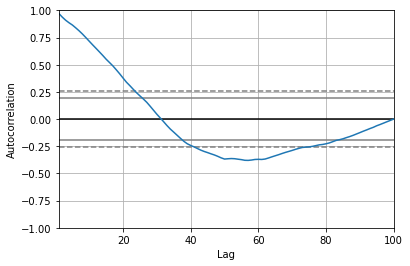

In [9]:
pd.plotting.autocorrelation_plot(df['close'][0:100])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

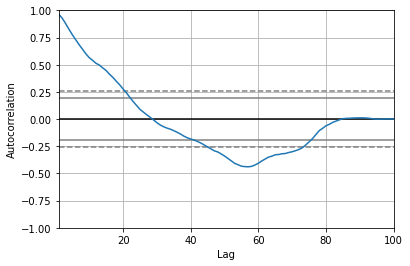

In [10]:
pd.plotting.autocorrelation_plot(df['close'][1000:1100])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

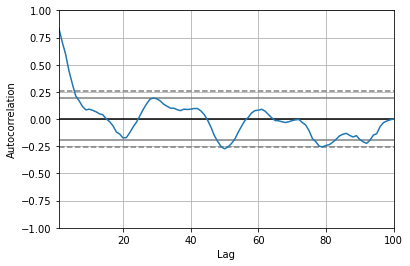

In [23]:
pd.plotting.autocorrelation_plot(df['close'][3200:3300])

In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [20]:
clf = QuadraticDiscriminantAnalysis()

In [21]:
clf.fit(X_train, y_train)

/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/antoine/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [30]:
train = []
for s in range(len(X_train)) : 
    train.append(clf.predict(X_train[s].reshape(X_train[s].shape[0],1)))



In [ ]:
clf.predict(X_train[s].reshape(X_train[s].shape[0],1)